<div class="alert alert-block alert-danger">
<b>Package version :</b>
    <ol>
    <li>Tensorflow 2.4.1</li>
    <li>Keras 2.4.3</li>
    <li>Matplotlib 3.5.0</li>
    </ol>
</div>

In [ ]:
## Just disables the warning, doesn't take advantage of AVX/FMA to run faster
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
#model1 menggunakan Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.6456 - acc: 0.8221 - val_loss: 0.2193 - val_acc: 0.9407
Epoch 2/10
600/600 [==============================] - 1s 1ms/step - loss: 0.2038 - acc: 0.9421 - val_loss: 0.1576 - val_acc: 0.9538
Epoch 3/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1460 - acc: 0.9597 - val_loss: 0.1297 - val_acc: 0.9619
Epoch 4/10
600/600 [==============================] - 1s 1ms/step - loss: 0.1142 - acc: 0.9686 - val_loss: 0.1106 - val_acc: 0.9669
Epoch 5/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0948 - acc: 0.9730 - val_loss: 0.1028 - val_acc: 0.9677
Epoch 6/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0795 - acc: 0.9776 - val_loss: 0.0938 - val_acc: 0.9700
Epoch 7/10
600/600 [==============================] - 1s 1ms/step - loss: 0.0689 - acc: 0.9806 - val_loss: 0.0911 - val_acc: 0.9709
Epoch 8/10
600/600 [==============================] - 1s 1ms/step - loss: 0.

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (100, 784)                0         
_________________________________________________________________
dense (Dense)                (100, 64)                 50240     
_________________________________________________________________
dense_1 (Dense)              (100, 10)                 650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 0s 618us/step - loss: 0.0791 - acc: 0.9760


[0.07907210290431976, 0.9760000109672546]

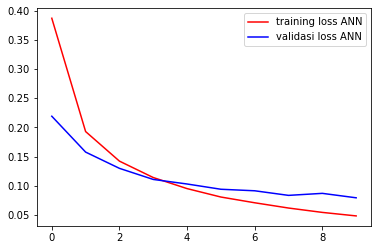

In [ ]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [ ]:
import numpy as np

pred = model1.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

label actual: 3
label prediction: 3
